# This is the second take home exercise

Relax Inc. makes productivity and project management software that's popular with both individuals and teams. Founded by several former Facebook employees, it's considered a great company to work for.


The data is available as two attached CSV files:
takehome_user_engagement. csv
takehome_users . csv
The data has the following two tables:
1] A user table ( "takehome_users" ) with data on 12,000 users who signed up for the
product in the last two years. This table includes:
● name: the user's name
● object_id: the user's id
● email: email address
● creation_source: how their account was created. This takes on one
of 5 values:
○ PERSONAL_PROJECTS: invited to join another user's
personal workspace
○ GUEST_INVITE: invited to an organization as a guest
(limited permissions)
○ ORG_INVITE: invited to an organization (as a full member)
○ SIGNUP: signed up via the website
○ SIGNUP_GOOGLE_AUTH: signed up using Google
Authentication (using a Google email account for their login
id)
● creation_time: when they created their account
● last_session_creation_time: unix timestamp of last login
● opted_in_to_mailing_list: whether they have opted into receiving
marketing emails
● enabled_for_marketing_drip: whether they are on the regular
marketing email drip
● org_id: the organization (group of users) they belong to
● invited_by_user_id: which user invited them to join (if applicable).
2] A usage summary table ( "takehome_user_engagement" ) that has a row for each day
that a user logged into the product.

We will design it as a project management profile. The plan will be based on individual project. Each project will have name, user_id, email, how to it created,

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# read data files
df_user_engagement=pd.read_csv("C:\\Users\\mohua\\OneDrive\\Documents\\take home challenge 2\\relax_challenge\\takehome_user_engagement.csv")
print(df_user_engagement.head())
df_user_engagement.visited.unique()
df_user_engagement.info()

            time_stamp  user_id  visited
0  2014-04-22 03:53:30        1        1
1  2013-11-15 03:45:04        2        1
2  2013-11-29 03:45:04        2        1
3  2013-12-09 03:45:04        2        1
4  2013-12-25 03:45:04        2        1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [3]:
df_user_information=pd.read_csv("C:\\Users\\mohua\\OneDrive\\Documents\\take home challenge 2\\relax_challenge\\takehome_users.csv",encoding='ISO-8859-1')
df_user_information.head()
df_user_information.info()

# Apparently there is inconsitency on the last_session_creation_time and invited_by_user_id 
print('There are ',df_user_information.last_session_creation_time.isnull().sum(),' null values')
print('There are ',df_user_information.invited_by_user_id .isnull().sum(),' null values')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB
There are  3177  null values
There are  5583  null values


Apparently the df_user_information needs do some cleaning work. The first thing to do is to change 'object_id" to 'user_id". Then need change the last_session_creation_time to timestamp

In [4]:
# Fill null with 0
df_user_information['last_session_creation_time'].fillna(0,inplace=True)
print('There are ',df_user_information.last_session_creation_time.isnull().sum(),' null values')

There are  0  null values


In [5]:
# Change the column name from 'object_id' to 'user_id'
df_user_information.rename(columns={'object_id':'user_id'},inplace=True)
df_user_information.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
# change last_session_creation_time to datetime
df_user_information['last_session_creation_time']=pd.to_datetime(df_user_information['last_session_creation_time'],unit='s')
df_user_information.head(20) 

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,1970-01-01 00:00:00,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,1970-01-01 00:00:00,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143.0


Identify the 'adopted' user, which has logged into the product at least on three sepearte days in 7 days 

In [7]:
# Find the user to logged into the product more then 3 days
user_log_in=df_user_engagement
user_log_in.set_index('time_stamp',inplace=True)
user_log_in.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [8]:
# max use_id
user_log_in.max()

user_id    12000
visited        1
dtype: int64

In [9]:
# create another droplist for 3 separate days in at leat one 7- days period
user_log_in_7days=user_log_in
user_log_in_7days.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  207917 non-null  int64
 1   visited  207917 non-null  int64
dtypes: int64(2)
memory usage: 4.8+ MB


In [10]:
# set index to time series
user_log_in_7days.index=pd.to_datetime(user_log_in_7days.index)
user_log_in_7days=user_log_in_7days.reset_index()
user_log_in_7days.head(20)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


#calculate three days difference in any time stamps. If the three days difference is within 7 days. Then the user_id should be adopt

In [11]:
# Calculate the three days differences and put it in a new columns days
user_log_in_7days['days']=user_log_in_7days['time_stamp'].diff(2)
user_log_in_7days.head(30)

,time_stamp,user_id,visited,days
0,2014-04-22 03:53:30,1,1,NaT
1,2013-11-15 03:45:04,2,1,NaT
2,2013-11-29 03:45:04,2,1,-145 days +23:51:34
3,2013-12-09 03:45:04,2,1,24 days 00:00:00
4,2013-12-25 03:45:04,2,1,26 days 00:00:00
5,2013-12-31 03:45:04,2,1,22 days 00:00:00
6,2014-01-08 03:45:04,2,1,14 days 00:00:00
7,2014-02-03 03:45:04,2,1,34 days 00:00:00
8,2014-02-08 03:45:04,2,1,31 days 00:00:00
9,2014-02-09 03:45:04,2,1,6 days 00:00:00


#Adopt user should be the user days<7 days. However the days were timedelta. So we need convert it to int64 first. We will store the days in a new column-'days_difference'

In [12]:
user_log_in_7days['days_difference']=user_log_in_7days['days'].dropna().dt.days.astype('int64')
user_log_in_7days.info()
user_log_in_7days.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   time_stamp       207917 non-null  datetime64[ns] 
 1   user_id          207917 non-null  int64          
 2   visited          207917 non-null  int64          
 3   days             207915 non-null  timedelta64[ns]
 4   days_difference  207915 non-null  float64        
dtypes: datetime64[ns](1), float64(1), int64(2), timedelta64[ns](1)
memory usage: 7.9 MB


,time_stamp,user_id,visited,days,days_difference
0,2014-04-22 03:53:30,1,1,NaT,NaN
1,2013-11-15 03:45:04,2,1,NaT,NaN
2,2013-11-29 03:45:04,2,1,-145 days +23:51:34,-145.0
3,2013-12-09 03:45:04,2,1,24 days 00:00:00,24.0
4,2013-12-25 03:45:04,2,1,26 days 00:00:00,26.0
5,2013-12-31 03:45:04,2,1,22 days 00:00:00,22.0
6,2014-01-08 03:45:04,2,1,14 days 00:00:00,14.0
7,2014-02-03 03:45:04,2,1,34 days 00:00:00,34.0
8,2014-02-08 03:45:04,2,1,31 days 00:00:00,31.0
9,2014-02-09 03:45:04,2,1,6 days 00:00:00,6.0


#The time_difference column has been converted. From here, we can see that there were some data below 7. So we will assign the data to user_clean without time_stamp column, visited, days. We will look at adopt_list from user_clean dataframe.

In [13]:
user_clean=user_log_in_7days.drop(columns=['time_stamp','visited','days'])
user_clean_1=user_clean.dropna(axis=0)
user_clean_2=user_clean_1[user_clean_1['days_difference']>0]
user_clean_3=user_clean_2[user_clean_1['days_difference']<8]
user_clean_3.head()
adopt_list=user_clean_3.groupby('user_id').mean()
adopt_list.head(20)

C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,days_difference
user_id,
2,6.000000
10,3.153558
20,2.000000
33,6.750000
42,2.887538
43,3.666667
50,6.666667
53,3.666667
60,7.000000


In [14]:
adopt_list.info()
adopt_list.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1734 entries, 2 to 11988
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   days_difference  1734 non-null   float64
dtypes: float64(1)
memory usage: 27.1 KB


,days_difference
user_id,
2,6.000000
10,3.153558
20,2.000000
33,6.750000
42,2.887538


Adopt_list has been created. Then join the adopt_list with df_user_information

In [15]:
# concate two dataframe together with column merge. The new dataframe is called df
df_user_information1=df_user_information
df_user_information1.set_index('user_id',inplace=True)

In [16]:
df=pd.concat([df_user_information1,adopt_list],axis=1)
df.head(20)

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,days_difference
user_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,NaN
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,6.000000
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,NaN
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,NaN
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,NaN
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0,NaN
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,NaN,NaN
8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,1970-01-01 00:00:00,1,1,74,NaN,NaN
9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,1970-01-01 00:00:00,0,0,302,NaN,NaN


In [17]:
# fill null in days_differences as 0
df.fillna(0,inplace=True)
df.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,days_difference
user_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,6.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0


In [18]:
# Add 'adopted_user' column. If no adopted_use, value=0, adopted_user value=1
df['adopted_user']=df['days_difference'].astype(int)
df.loc[df['adopted_user']>0,'adopted_user']=1
df.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,days_difference,adopted_user
user_id,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,6.0,1
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0,0


In [19]:
# calculte the difference days between last session create time vs. creation time
df['creation_time']=pd.to_datetime(df['creation_time'])
df['days_differene_last_session_creation_time']=(df['last_session_creation_time']-df['creation_time']).dropna().dt.days.astype('int64')
df.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,days_difference,adopted_user,days_differene_last_session_creation_time
user_id,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0,0,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,6.0,1,136
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0,0,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0,0,1
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0,0,5


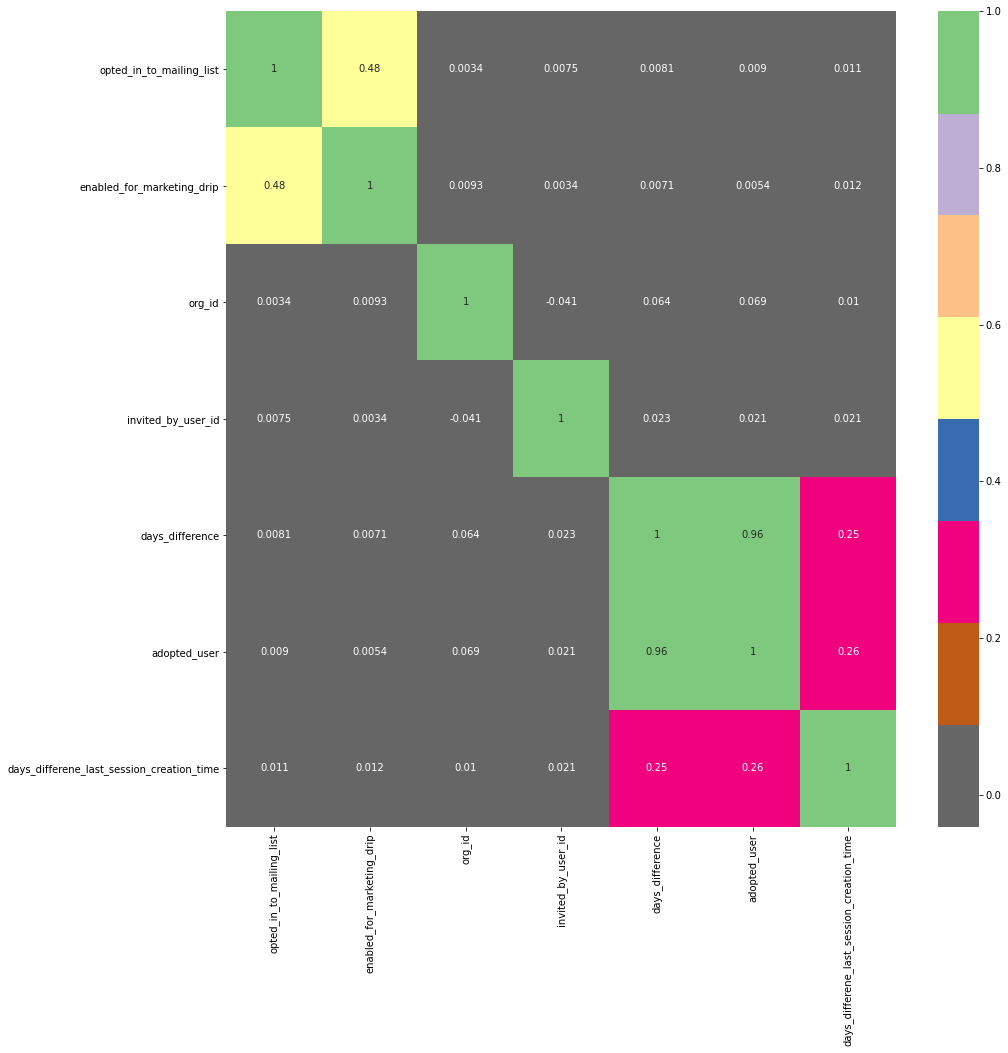

In [22]:
# use heatmap to see the importance of features
import seaborn as sns
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
sns.heatmap(df.corr(),cmap='Accent_r',annot=True,ax=ax)

#The adopted user seems to related to the org_id, invisted by other user, the difference between last day to sign-in vs. creation time.

In [28]:
# slice the name to a new dataframe
df_name = pd.DataFrame([df.name, df.adopted_user]).transpose()
df_name.set_index('name',inplace=True)
df_name_summary=df_name.groupby('adopted_user').sum()

# name is not an important feature

,adopted_user
name,
Clausen August,0
Poole Matthew,1
Bottrill Mitchell,0
Clausen Nicklas,0
Raw Grace,0


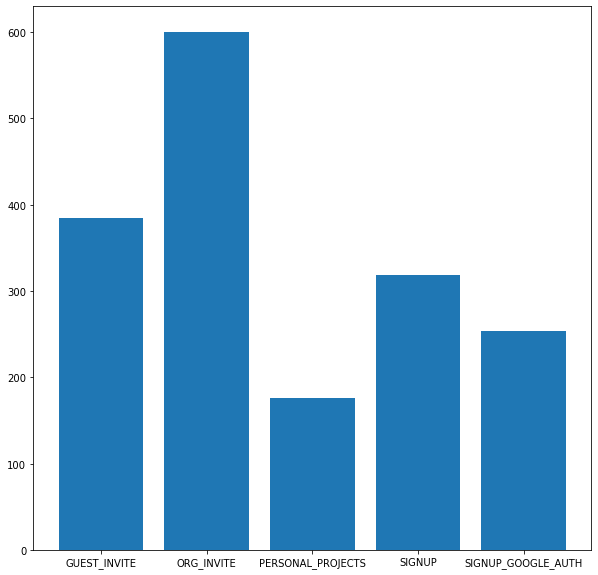

In [43]:
# Creation Source
df_creation_source = pd.DataFrame([df.creation_source,df.adopted_user]).transpose()
df_creation_source.set_index('creation_source',inplace=True)
df_creation_source_summary=df_creation_source.groupby('creation_source').sum()
df_creation_source_summary.head()
plt.figure(figsize=(10,10))
plt.bar(df_creation_source_summary.index,df_creation_source_summary['adopted_user'])
plt.show()

# creation_source seems to be a features